# Section 1: Introduction + Data Analysis and Visualization

The analysis carried out below tries to explain the usage of rental bikes in NYC as well as to create useful model to predict future patterns.

First, the necessary imports. The dataset is loaded, the first few lines are visualized, along with the main descriptive statistics, only meaningful for tripduration and birth_year.

In [1]:
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import geopy.distance
df=pd.read_csv("Trips_2018.csv")

In [2]:
from utils import *

In [3]:
%matplotlib inline

In [4]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
df.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


Date and time values are converted in datetime formats, entries with null values are deleted from the dataset.

In [6]:
for i in ['starttime', 'stoptime']: df[i]=pd.to_datetime(df[i],format='%Y-%m-%d %H:%M:%S'); df=df.dropna()

Some stations were located in Montreal, this is probably due to a GPS error. They are removed. Trips longer than 12 hours are removed, as they were probably errors from users who forgot to return the bike. Citibike trips are not meant to last more than a few hours at most. Station locations are plotted, along with cumulative trip durations. Most trips are shorter than 1 hour, they are plotted separately for greater detail.

In [7]:
for i in ['start_station_latitude', 'end_station_latitude']: df=df[df[i]<42]; df=df[df['tripduration']<=60*60*12]

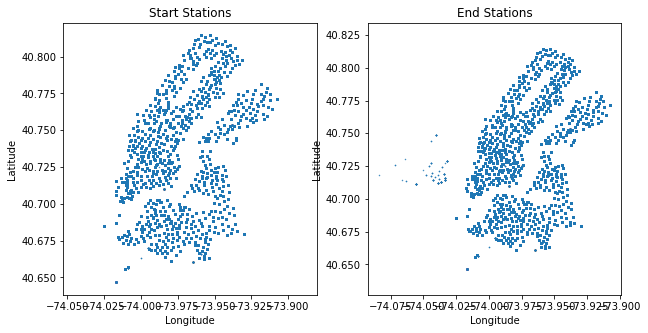

In [8]:
stations(df)

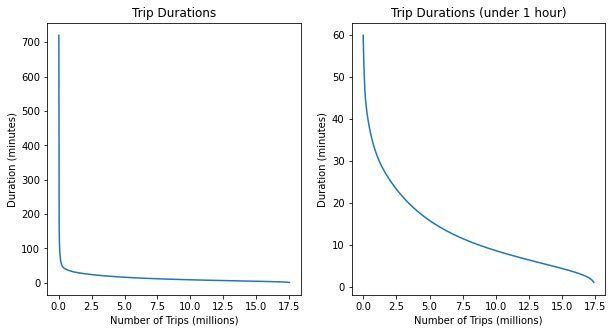

In [9]:
durations(df)

Start stations are plotted and coloured based on the number of pickups. The most used ones are clearly in Manhattan, around the Times Square area.

In [10]:
df_ss=pd.DataFrame({'counts':df.groupby(['start_station_latitude', 'start_station_longitude']).size()}).reset_index() 

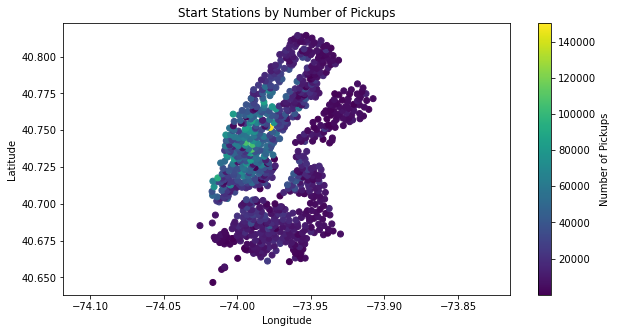

In [11]:
pickups(df_ss)

Birth year outliers (having a z-score higher than 3) are removed. Many birth dates are meaningless, and were probably a user not revealing their true age. Birth years are described in the boxplot, and more specifically the outliers are explored in a histogram. An 'age' column is created instead of 'birth_year', to have a more intuitive value, and other unnecessary columns are removed.

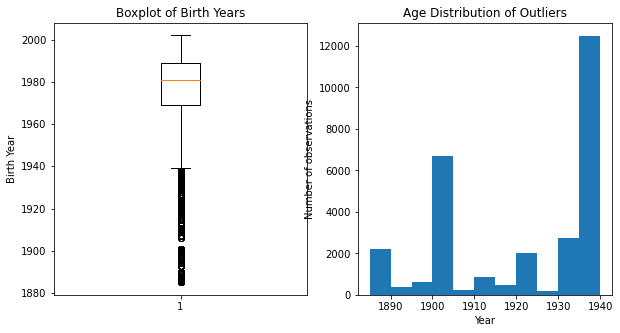

In [12]:
years(df)

In [13]:
df=df[(np.abs(stats.zscore(df['birth_year']))<=3)]; df['age']=2018-df['birth_year']; del df['birth_year']; del df['Unnamed: 0']

Age distribution is plotted. There is a big spike corresponding to 49-year-olds. This is certainly unusual, and is due to the fact that 49-year-olds in 2018 would be born in 1969. Many people thought this a funny way to hide their real age. It is clear from the graph that the main age group using the service is 25-35 year olds.

In [14]:
pickups_age=df['tripduration'].groupby(by=df['age']).count()

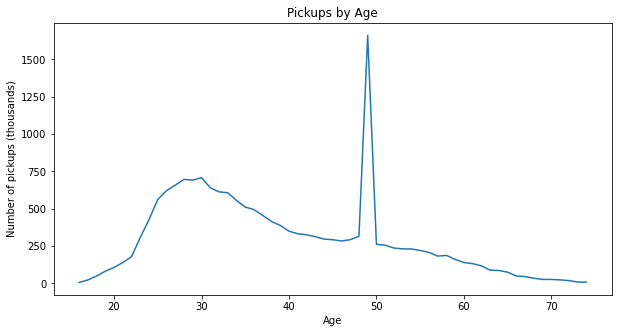

In [15]:
age(pickups_age)

Daily pickups for the whole year, along with a more clear 7 day moving average graph, are in plotted. There is a clear increase in the summer months, and periodical drops can be seen (in the moving average), corresponding to weekends.

In [16]:
d_pickups=df['tripduration'].groupby(by=df['starttime'].dt.date).count(); d_pickups_r=d_pickups.rolling(7, 1).mean()

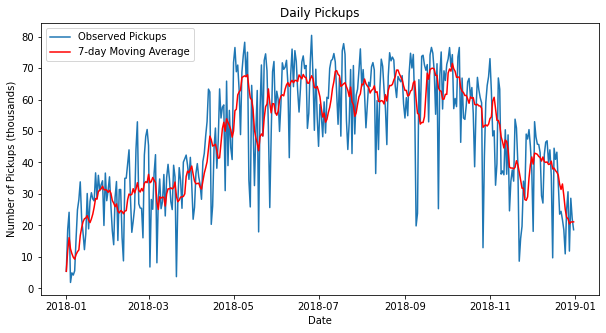

In [17]:
daily(d_pickups, d_pickups_r)

The average hourly pickups change by weekday: during the week there are two very obvious peaks corresponding to morning and evening rush hour, while in the weekend the trend is opposite, with more rides taking place in the middle of the day. They are leasurely rides, and altogether lower in number.

In [18]:
pickups_wday=df['tripduration'].groupby(by=[df['starttime'].dt.weekday, df['starttime'].dt.hour]).count()

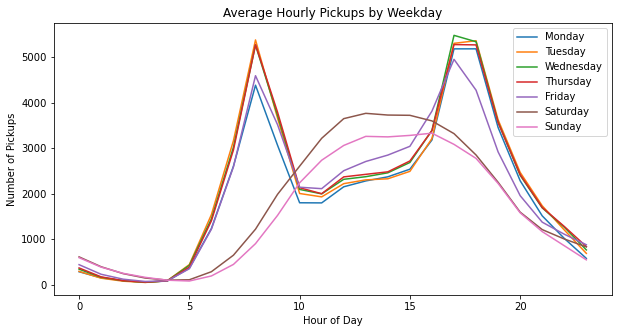

In [19]:
hourly(pickups_wday)

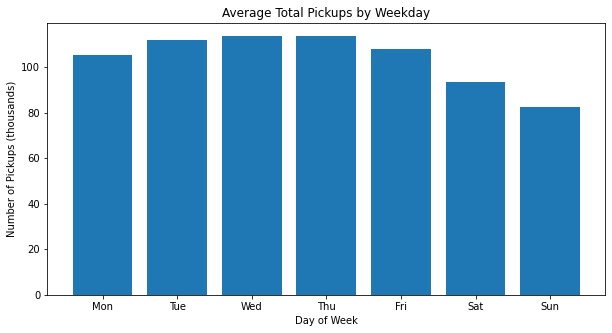

In [20]:
weekday(pickups_wday)

A much higher share of men use the Citibike service then women: the difference is less strong (but still very significant) in the weekends, which means that women do not use the Citibike bikes for commuting as much. The share of women using the service is higher during the central hours of the day, and much lower at night. This is probably due to the perceived safety of cycling around a big city alone at night.

In [21]:
pickups_wday_g=df['tripduration'].groupby(by=[df.gender, df['starttime'].dt.weekday]).count()
pickups_hday_g=df['tripduration'].groupby(by=[df.gender, df['starttime'].dt.hour]).count()

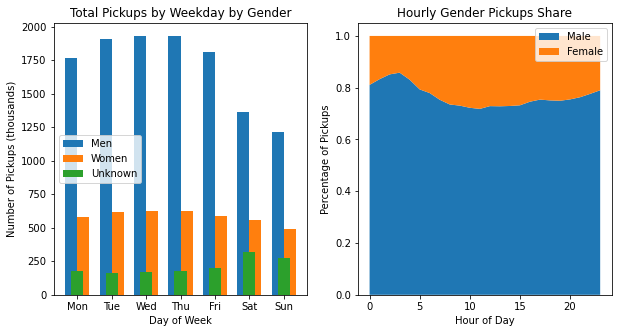

In [22]:
gender(pickups_wday_g, pickups_hday_g)

Subscribed users use Citibike predominantly during the week, occasional users ('Customers') have a lower share of the use, and their usage pattern during the day corresponds much more to that of weekend users.

In [23]:
pickups_wday_u=df['tripduration'].groupby(by=[df.usertype, df['starttime'].dt.weekday]).count()
pickups_hday_u=df['tripduration'].groupby(by=[df.usertype, df['starttime'].dt.hour]).count()

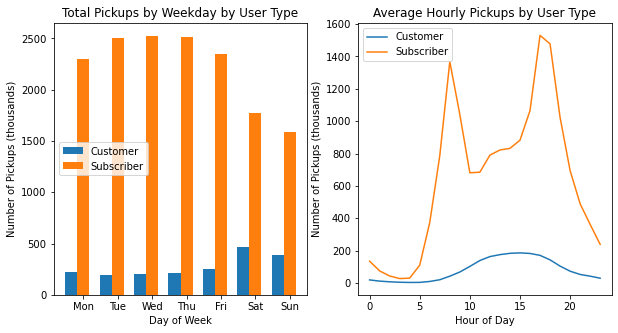

In [24]:
user(pickups_wday_u, pickups_hday_u)

# Section 2: Prediction Challenge
## Data Preparation

Two new columns containing the date and hour of pickup are created, to group the dataframe into hourly intervals for each day.

In [25]:
df['date']=np.array([d.date() for d in df['starttime']]); df['hour']=np.array([d.hour for d in df['starttime']])
df_=pd.DataFrame({'pickups':df.groupby(["date","hour"]).size()}).reset_index()
df_['date']=pd.to_datetime(df_['date'],format='%Y-%m-%d %H')

Pickup values lagged by one week and two weeks are added to the dataframe, along with a dummy variable for weekday/weekend. Dummy variables for the season are then created.

In [26]:
df_=lag_function(df_, ['pickups'], lag=24*7); df_=lag_function(df_, ['pickups'], lag=24*7*2)
df_['weekday']=np.where(df_['date'].dt.dayofweek.isin([5,6]), 0, 1)
df_['day']=[el.weekday() for el in df_['date']]
df_=pd.get_dummies(df_, columns=['day'],drop_first=True)
seasons(df_)

The correlation matrix is plotted. There is a medium correlation level with most variables, while few explanatory variables have significant levels of correlation between themselves

In [27]:
corr_mat=df_.corr()

<Figure size 720x720 with 0 Axes>

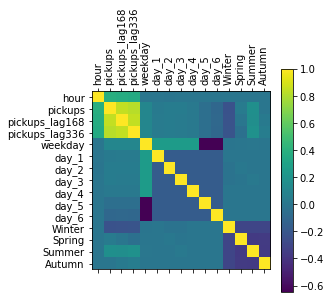

In [28]:
corr_matrix(corr_mat, df_)

## Prediction Part 1

A copy of the database is created for the prediction. A train set (from June 1st to July 31st) and a test set (from August 1st to August 7th) are extracted from it, and only the relevant columns are kept.

In [29]:
df_pred=df_.copy()

In [30]:
x_train, x_test, y_train, y_test=train_test_1(df_pred)

A linear regression model is created. The model is calibrated on the data and the model predictions are stored in a separate list.

In [31]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression(fit_intercept=True)

In [32]:
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

The R^2 score for the model is calculated. It is a satisfactory value. The mean absolute percentage error is calculated, to express the error in percentage terms. Its value is also acceptable.

In [33]:
r2=r2_score(y_test, y_pred); mape=np.mean(np.abs((y_test-y_pred)/y_test))*100; print('R2: %f \tMAPE: %f' %(r2, mape))

R2: 0.888309 	MAPE: 29.735974


The predicted data is plotted against the observed data. The model is less precise during some of the rush hour peaks, but overall performs quite well, both in the weekdays and weekends.

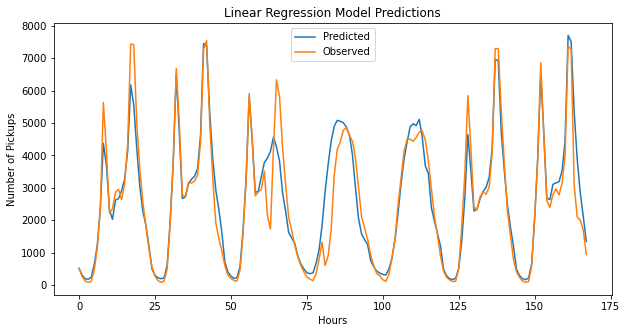

In [34]:
linreg_graph(y_pred,y_test)

A 45 degree plot is drawn to show how the predicted and observed values relate to each other. They are very concentrated around the diagonal line, which means there are mostly good predictions.

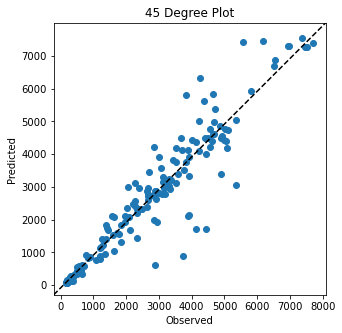

In [35]:
plot_45(y_test, y_pred)

## Prediction Part 2

The train and test set are split respectively until August 31st and from November 1st, leaving September and October for the validation set. Only the relevant columns are kept and the data is standardized.

In [36]:
df_pred=df_.copy()

In [37]:
x_train, x_val, x_test, y_train, y_val, y_test=train_test_2(df_pred)

A keras model with 1 input, 4 hidden and 1 output layers and 600 epochs, is compiled. It is then trained it on the data and its predictions are evaluated.

In [38]:
from keras.callbacks import History 
history = History()

from keras.models import Sequential
from keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(200, input_dim=len(x_train.columns), activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(150, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='relu'))

model.compile(loss='MSE', optimizer='adam', metrics=['MSE']) 

model.fit(x_train, y_train, epochs=600, batch_size=128, validation_data=(x_val,y_val), callbacks=[history])

Epoch 1/600
42/42 [==============================] - 1s 11ms/step - loss: 7726588.5000 - MSE: 7726588.5000 - val_loss: 9227986.0000 - val_MSE: 9227986.0000
Epoch 2/600
42/42 [==============================] - 0s 7ms/step - loss: 4742403.5000 - MSE: 4742403.5000 - val_loss: 3606188.5000 - val_MSE: 3606188.5000
Epoch 3/600
42/42 [==============================] - 0s 3ms/step - loss: 3287858.2500 - MSE: 3287858.2500 - val_loss: 3629624.0000 - val_MSE: 3629624.0000
Epoch 4/600
42/42 [==============================] - 0s 3ms/step - loss: 3194561.5000 - MSE: 3194561.5000 - val_loss: 3654780.2500 - val_MSE: 3654780.2500
Epoch 5/600
42/42 [==============================] - 0s 3ms/step - loss: 3177035.7500 - MSE: 3177035.7500 - val_loss: 3570732.0000 - val_MSE: 3570732.0000
Epoch 6/600
42/42 [==============================] - 0s 4ms/step - loss: 3184455.5000 - MSE: 3184455.5000 - val_loss: 3604191.0000 - val_MSE: 3604191.0000
Epoch 7/600
42/42 [==============================] - 0s 4ms/step - lo

42/42 [==============================] - 0s 4ms/step - loss: 2627659.7500 - MSE: 2627659.7500 - val_loss: 2682143.0000 - val_MSE: 2682143.0000
Epoch 54/600
42/42 [==============================] - 0s 4ms/step - loss: 2556755.5000 - MSE: 2556755.5000 - val_loss: 2642053.2500 - val_MSE: 2642053.2500
Epoch 55/600
42/42 [==============================] - 0s 4ms/step - loss: 2492473.7500 - MSE: 2492473.7500 - val_loss: 2565809.5000 - val_MSE: 2565809.5000
Epoch 56/600
42/42 [==============================] - 0s 3ms/step - loss: 2558384.0000 - MSE: 2558384.0000 - val_loss: 2620665.0000 - val_MSE: 2620665.0000
Epoch 57/600
42/42 [==============================] - 0s 4ms/step - loss: 2497839.0000 - MSE: 2497839.0000 - val_loss: 2434187.2500 - val_MSE: 2434187.2500
Epoch 58/600
42/42 [==============================] - 0s 4ms/step - loss: 2476545.2500 - MSE: 2476545.2500 - val_loss: 2502720.5000 - val_MSE: 2502720.5000
Epoch 59/600
42/42 [==============================] - 0s 4ms/step - loss: 247

42/42 [==============================] - 0s 4ms/step - loss: 1976425.2500 - MSE: 1976425.2500 - val_loss: 1727656.0000 - val_MSE: 1727656.0000
Epoch 106/600
42/42 [==============================] - 0s 4ms/step - loss: 1924107.3750 - MSE: 1924107.3750 - val_loss: 1812168.8750 - val_MSE: 1812168.8750
Epoch 107/600
42/42 [==============================] - 0s 4ms/step - loss: 1957165.7500 - MSE: 1957165.7500 - val_loss: 1755182.3750 - val_MSE: 1755182.3750
Epoch 108/600
42/42 [==============================] - 0s 4ms/step - loss: 1910202.1250 - MSE: 1910202.1250 - val_loss: 1784989.1250 - val_MSE: 1784989.1250
Epoch 109/600
42/42 [==============================] - 0s 4ms/step - loss: 1902977.6250 - MSE: 1902977.6250 - val_loss: 1781908.8750 - val_MSE: 1781908.8750
Epoch 110/600
42/42 [==============================] - 0s 3ms/step - loss: 1960669.8750 - MSE: 1960669.8750 - val_loss: 1793909.0000 - val_MSE: 1793909.0000
Epoch 111/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1798515.0000 - MSE: 1798515.0000 - val_loss: 1623322.8750 - val_MSE: 1623322.8750
Epoch 158/600
42/42 [==============================] - 0s 4ms/step - loss: 1880415.1250 - MSE: 1880415.1250 - val_loss: 1738961.2500 - val_MSE: 1738961.2500
Epoch 159/600
42/42 [==============================] - 0s 3ms/step - loss: 1862215.2500 - MSE: 1862215.2500 - val_loss: 1908218.0000 - val_MSE: 1908218.0000
Epoch 160/600
42/42 [==============================] - 0s 4ms/step - loss: 1836573.6250 - MSE: 1836573.6250 - val_loss: 1618086.1250 - val_MSE: 1618086.1250
Epoch 161/600
42/42 [==============================] - 0s 4ms/step - loss: 1785761.0000 - MSE: 1785761.0000 - val_loss: 1662757.3750 - val_MSE: 1662757.3750
Epoch 162/600
42/42 [==============================] - 0s 4ms/step - loss: 1798172.3750 - MSE: 1798172.3750 - val_loss: 1642438.3750 - val_MSE: 1642438.3750
Epoch 163/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1638736.8750 - MSE: 1638736.8750 - val_loss: 1505281.1250 - val_MSE: 1505281.1250
Epoch 210/600
42/42 [==============================] - 0s 4ms/step - loss: 1711283.2500 - MSE: 1711283.2500 - val_loss: 1374119.2500 - val_MSE: 1374119.2500
Epoch 211/600
42/42 [==============================] - 0s 4ms/step - loss: 1698887.5000 - MSE: 1698887.5000 - val_loss: 1451863.3750 - val_MSE: 1451863.3750
Epoch 212/600
42/42 [==============================] - 0s 4ms/step - loss: 1681873.8750 - MSE: 1681873.8750 - val_loss: 1391148.1250 - val_MSE: 1391148.1250
Epoch 213/600
42/42 [==============================] - 0s 4ms/step - loss: 1705664.8750 - MSE: 1705664.8750 - val_loss: 1472423.8750 - val_MSE: 1472423.8750
Epoch 214/600
42/42 [==============================] - 0s 4ms/step - loss: 1629963.3750 - MSE: 1629963.3750 - val_loss: 1590328.2500 - val_MSE: 1590328.2500
Epoch 215/600
42/42 [==============================] - 0s 3ms/step - los

42/42 [==============================] - 0s 3ms/step - loss: 1424322.2500 - MSE: 1424322.2500 - val_loss: 1393696.7500 - val_MSE: 1393696.7500
Epoch 262/600
42/42 [==============================] - 0s 3ms/step - loss: 1483329.6250 - MSE: 1483329.6250 - val_loss: 1394133.7500 - val_MSE: 1394133.7500
Epoch 263/600
42/42 [==============================] - 0s 4ms/step - loss: 1491517.3750 - MSE: 1491517.3750 - val_loss: 1404861.5000 - val_MSE: 1404861.5000
Epoch 264/600
42/42 [==============================] - 0s 4ms/step - loss: 1407328.0000 - MSE: 1407328.0000 - val_loss: 1334052.7500 - val_MSE: 1334052.7500
Epoch 265/600
42/42 [==============================] - 0s 4ms/step - loss: 1455218.5000 - MSE: 1455218.5000 - val_loss: 1399806.0000 - val_MSE: 1399806.0000
Epoch 266/600
42/42 [==============================] - 0s 4ms/step - loss: 1473246.0000 - MSE: 1473246.0000 - val_loss: 1419059.6250 - val_MSE: 1419059.6250
Epoch 267/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1329691.6250 - MSE: 1329691.6250 - val_loss: 1251607.2500 - val_MSE: 1251607.2500
Epoch 314/600
42/42 [==============================] - 0s 4ms/step - loss: 1274143.5000 - MSE: 1274143.5000 - val_loss: 1309079.6250 - val_MSE: 1309079.6250
Epoch 315/600
42/42 [==============================] - 0s 4ms/step - loss: 1288618.0000 - MSE: 1288618.0000 - val_loss: 1203609.2500 - val_MSE: 1203609.2500
Epoch 316/600
42/42 [==============================] - 0s 4ms/step - loss: 1284411.3750 - MSE: 1284411.3750 - val_loss: 1332153.6250 - val_MSE: 1332153.6250
Epoch 317/600
42/42 [==============================] - 0s 4ms/step - loss: 1237476.0000 - MSE: 1237476.0000 - val_loss: 1368558.0000 - val_MSE: 1368558.0000
Epoch 318/600
42/42 [==============================] - 0s 4ms/step - loss: 1291616.6250 - MSE: 1291616.6250 - val_loss: 1259408.3750 - val_MSE: 1259408.3750
Epoch 319/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1195086.1250 - MSE: 1195086.1250 - val_loss: 1184091.7500 - val_MSE: 1184091.7500
Epoch 366/600
42/42 [==============================] - 0s 4ms/step - loss: 1227892.8750 - MSE: 1227892.8750 - val_loss: 1220637.8750 - val_MSE: 1220637.8750
Epoch 367/600
42/42 [==============================] - 0s 3ms/step - loss: 1237529.1250 - MSE: 1237529.1250 - val_loss: 1209763.8750 - val_MSE: 1209763.8750
Epoch 368/600
42/42 [==============================] - 0s 4ms/step - loss: 1228238.8750 - MSE: 1228238.8750 - val_loss: 1239561.8750 - val_MSE: 1239561.8750
Epoch 369/600
42/42 [==============================] - 0s 4ms/step - loss: 1230212.3750 - MSE: 1230212.3750 - val_loss: 1252737.0000 - val_MSE: 1252737.0000
Epoch 370/600
42/42 [==============================] - 0s 5ms/step - loss: 1261061.6250 - MSE: 1261061.6250 - val_loss: 1144115.8750 - val_MSE: 1144115.8750
Epoch 371/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1215401.0000 - MSE: 1215401.0000 - val_loss: 1244446.3750 - val_MSE: 1244446.3750
Epoch 418/600
42/42 [==============================] - 0s 4ms/step - loss: 1234959.3750 - MSE: 1234959.3750 - val_loss: 1308891.2500 - val_MSE: 1308891.2500
Epoch 419/600
42/42 [==============================] - 0s 4ms/step - loss: 1177872.7500 - MSE: 1177872.7500 - val_loss: 1281415.3750 - val_MSE: 1281415.3750
Epoch 420/600
42/42 [==============================] - 0s 4ms/step - loss: 1189565.1250 - MSE: 1189565.1250 - val_loss: 1118074.3750 - val_MSE: 1118074.3750
Epoch 421/600
42/42 [==============================] - 0s 4ms/step - loss: 1159411.5000 - MSE: 1159411.5000 - val_loss: 1122846.1250 - val_MSE: 1122846.1250
Epoch 422/600
42/42 [==============================] - 0s 4ms/step - loss: 1213820.2500 - MSE: 1213820.2500 - val_loss: 1290023.7500 - val_MSE: 1290023.7500
Epoch 423/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1181527.2500 - MSE: 1181527.2500 - val_loss: 1184455.7500 - val_MSE: 1184455.7500
Epoch 470/600
42/42 [==============================] - 0s 4ms/step - loss: 1154973.6250 - MSE: 1154973.6250 - val_loss: 1173101.7500 - val_MSE: 1173101.7500
Epoch 471/600
42/42 [==============================] - 0s 4ms/step - loss: 1171842.3750 - MSE: 1171842.3750 - val_loss: 1155197.1250 - val_MSE: 1155197.1250
Epoch 472/600
42/42 [==============================] - 0s 4ms/step - loss: 1159696.7500 - MSE: 1159696.7500 - val_loss: 1258766.2500 - val_MSE: 1258766.2500
Epoch 473/600
42/42 [==============================] - 0s 4ms/step - loss: 1181360.8750 - MSE: 1181360.8750 - val_loss: 1270018.2500 - val_MSE: 1270018.2500
Epoch 474/600
42/42 [==============================] - 0s 4ms/step - loss: 1148253.5000 - MSE: 1148253.5000 - val_loss: 1279387.3750 - val_MSE: 1279387.3750
Epoch 475/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 4ms/step - loss: 1190938.1250 - MSE: 1190938.1250 - val_loss: 1145966.0000 - val_MSE: 1145966.0000
Epoch 522/600
42/42 [==============================] - 0s 4ms/step - loss: 1176243.7500 - MSE: 1176243.7500 - val_loss: 1229431.0000 - val_MSE: 1229431.0000
Epoch 523/600
42/42 [==============================] - 0s 4ms/step - loss: 1146877.6250 - MSE: 1146877.6250 - val_loss: 1173886.6250 - val_MSE: 1173886.6250
Epoch 524/600
42/42 [==============================] - 0s 4ms/step - loss: 1204281.8750 - MSE: 1204281.8750 - val_loss: 1163706.8750 - val_MSE: 1163706.8750
Epoch 525/600
42/42 [==============================] - 0s 4ms/step - loss: 1151082.8750 - MSE: 1151082.8750 - val_loss: 1331221.3750 - val_MSE: 1331221.3750
Epoch 526/600
42/42 [==============================] - 0s 4ms/step - loss: 1161769.0000 - MSE: 1161769.0000 - val_loss: 1261804.0000 - val_MSE: 1261804.0000
Epoch 527/600
42/42 [==============================] - 0s 4ms/step - los

42/42 [==============================] - 0s 3ms/step - loss: 1177938.1250 - MSE: 1177938.1250 - val_loss: 1098276.1250 - val_MSE: 1098276.1250
Epoch 574/600
42/42 [==============================] - 0s 4ms/step - loss: 1093384.8750 - MSE: 1093384.8750 - val_loss: 1125075.5000 - val_MSE: 1125075.5000
Epoch 575/600
42/42 [==============================] - 0s 4ms/step - loss: 1089825.1250 - MSE: 1089825.1250 - val_loss: 1124257.2500 - val_MSE: 1124257.2500
Epoch 576/600
42/42 [==============================] - 0s 4ms/step - loss: 1197254.6250 - MSE: 1197254.6250 - val_loss: 1213626.7500 - val_MSE: 1213626.7500
Epoch 577/600
42/42 [==============================] - 0s 4ms/step - loss: 1132252.3750 - MSE: 1132252.3750 - val_loss: 1084101.8750 - val_MSE: 1084101.8750
Epoch 578/600
42/42 [==============================] - 0s 4ms/step - loss: 1194705.5000 - MSE: 1194705.5000 - val_loss: 1156491.2500 - val_MSE: 1156491.2500
Epoch 579/600
42/42 [==============================] - 0s 4ms/step - los

In [39]:
y_pred=model.predict(x_test)
r2=r2_score(y_test, y_pred); print('R2: ', r2)

R2:  0.5830490474879257


The R2 score is sufficiently high. The model predicts the overall trend of the data, but lacks the ability to precisely predict peaks in demand during the day. 

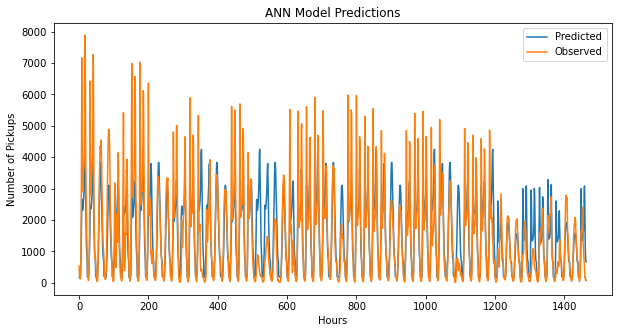

In [40]:
ann_graph(y_pred,y_test)

From the 45 degree plot it is clear that predictions are concentrated around lower pickup values, meaning the model predicts poorly for high numbers of pickups.

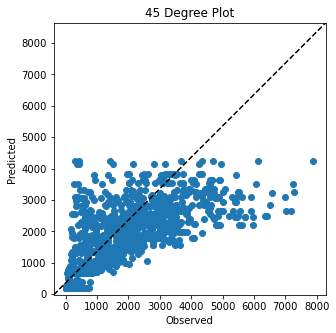

In [41]:
plot_45(y_pred,y_test)

The loss function of the test and validation sets is plotted, at 600 epochs it has reached a stable value.

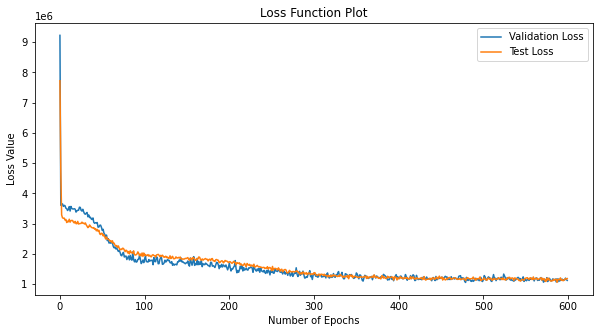

In [42]:
loss_graph(history)

# Section 3: Exploratory Component

In [43]:
#If the package geopy is not installed, please run the following code.
#!pip install geopy

## Metro analysis

The analysis that follows looks at the relation between the usage of bikes and public transport, in particular the metro. It might be useful to know whether bike stations closer to metro stations are used more or less than average since  as they could help the company determine better locations for future new stations. 
Furthermore, it will also be analyzed the relationship between the usage of bikes and public transport in different seasons and times of the day. This information is not useful to pick new locations for future stations, but it may help in order to reallocate bikes between stations. 

Bike station locations are extracted and stored in the data frame df_bike. A new set of data is imported with the information of location for metro station entrances in NYC (source: https://data.ny.gov/widgets/i9wp-a4ja). The unique locations are extracted from the metro stations.

In [44]:
df_bike=df.groupby(by='start_station_id').mean()[['start_station_latitude', 'start_station_longitude']]
df_metro=pd.read_csv("NYC_Transit_Subway_Entrance_And_Exit_Data.csv")
df_metro=df_metro.groupby(by='Station Name').mean()[['Station Latitude', 'Station Longitude']]

The following plot shows the location of the metro and bike stations.

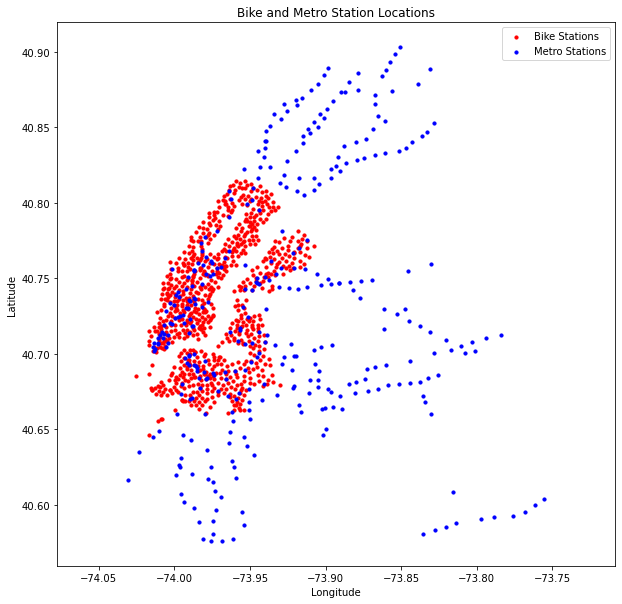

In [45]:
metrobike_graph(df_bike, df_metro)

The closest metro station to each of the bike station is found, and its name and the distance are added to the data frame df_bike. 

In [46]:
def shortest_metro(df_bike,df_metro):
    closest_metro=[]
    shortest_dist=[]
    for bikeid in df_bike.index:
        mid=''
        dist=1000000
        for metroid in df_metro.index:
            c_bike=tuple(df_bike.loc[bikeid])
            c_metro=tuple(df_metro.loc[metroid])
            if geopy.distance.distance(c_bike,c_metro).km<dist:
                dist=geopy.distance.distance(c_bike,c_metro).km
                mid=metroid
        closest_metro.append(mid)
        shortest_dist.append(dist) 
    df_bike['closest_metro']=closest_metro
    df_bike['dist_metro']=shortest_dist
    
shortest_metro(df_bike,df_metro)

Following, the next variable to gather is the number of pickups per bike station during the whole year. This is merged with the dataframe df_bike, which contains the closest metro station information. 

In [47]:
df_pickups_station=pd.DataFrame({'pickups':df.groupby(["start_station_id"]).size()}).reset_index() 
df_merged=df_bike.merge(df_pickups_station,left_on='start_station_id',right_on='start_station_id',how='left')

In [48]:
np.corrcoef(df_merged['dist_metro'],df_merged['pickups'])

array([[ 1.        , -0.22675238],
       [-0.22675238,  1.        ]])

It can be seen in the matrix that the correlation between the distance to the closest metro station and the number of pickups during a year is negative.

Taking this a step further, the correlation between the distance to the closest metro station and the number of pickups is explored considering only partitions of the data. In particular, the dataset is divided according to seasons and times of day.

### _Season_

A new dataset is created with season information.

In [49]:
seasons2(df)

In [50]:
df_pickups_station_season=pd.DataFrame({'pickups':df.groupby( ["start_station_id",'season'] ).size()}).reset_index()

In [51]:
df_merged_season=df_pickups_station_season.merge(df_bike,left_on='start_station_id',right_on='start_station_id',how='left')

In [52]:
for i in ['Autumn', 'Winter', 'Summer', 'Spring']:
    print(i, "\n", corr_function(i,df_merged_season, 'season'), "\n")

Autumn 
 [[ 1.         -0.22436161]
 [-0.22436161  1.        ]] 

Winter 
 [[ 1.         -0.22652852]
 [-0.22652852  1.        ]] 

Summer 
 [[ 1.         -0.22086481]
 [-0.22086481  1.        ]] 

Spring 
 [[ 1.         -0.22684905]
 [-0.22684905  1.        ]] 



The correlation between the distance to the closest metro station and the number of pickups does not change significantly when considering different seasons. 

### _Time of Day_

In the same way, a new dataset is created with time of day information.

In [53]:
daytime(df)

In [54]:
df_pickups_station_time=pd.DataFrame({'pickups' : df.groupby( ["start_station_id",'daytime'] ).size()}).reset_index()

In [55]:
df_merged_time=df_pickups_station_time.merge(df_bike,left_on='start_station_id',right_on='start_station_id',how='left')

In [56]:
for i in ['Evening', 'Afternoon', 'Morning', 'Night']:
    print(i, "\n", corr_function(i,df_merged_time, 'daytime'), "\n")

Evening 
 [[ 1.        -0.2440524]
 [-0.2440524  1.       ]] 

Afternoon 
 [[ 1.         -0.23822608]
 [-0.23822608  1.        ]] 

Morning 
 [[ 1.         -0.16801549]
 [-0.16801549  1.        ]] 

Night 
 [[ 1.         -0.17684541]
 [-0.17684541  1.        ]] 



The correlation is stronger in the evening and in the afternoon and weaker in the night and in the morning.

# Section 4: Conclusions

Some attributes given (birth_year, subscriber) cannot be used for the prediction since they would introduce data leakage. Nevertheless, a linear regression model is effective at predicting one week of pickups by using the previous two months of data. Lagged pickup data helps to increase the model performance because it has a high correlation with the target variable. The prediction period is short, so it makes sense to use lagged variables referring to a previous period. 

With 10 months as training data, we cannot use the same lagged variables to predict the next two months, since the model would be trained with data used to evaluate its performance. Because pickup rates vary substantially during the year, it isn’t ideal to use 2 months lagged variables. It is more efficient to predict according to the day of the week and the time of day, to consider weekly and daily patterns, and the season. The model used is an ANN, more powerful than a linear regression. The ANN achieves a satisfying R2 score, but it underestimates the number of pickups (cmp. 45 degree plot).   

The exploratory part of the project addresses the question whether the distance to the metro station has an influence on the usage of bikes. Citibike stations close to metro stations are more likely to have high numbers of pickups. Hence new stations should be preferably built close to a metro station. Seasons have no significant effect on the previous conclusion. However, there is a difference in the correlation for different times of day (lower in the morning and evening). This result gives valuable information that can be used, for instance, to improve bike reallocation strategies and, therefore, customer service. 

Contributions:

| Section    | Contribution |         |         |         |
|------------|:------------:|---------|---------|---------|
|            |      s212168 | s212597 | s212759 | s212745 |
| Section 1  |          20% |     30% |     20% |     30% |
| Section 2  |          30% |     20% |     30% |     20% |
| Section 3  |          30% |     20% |     30% |     20% |
| Conclusion |          20% |     30% |     20% |     30% |
